In [1]:
from FlowStorm.flow_surface import FlowSurface
from FlowStorm.toy_data import generate_discrete_dataset, generate_snowstorm_dataset

import jax.random as jr
import jax.numpy as jnp

import matplotlib.pyplot as plt

In [2]:
rng = jr.key(187)
N = 100_000
base_alpha = 0.
baseline_data = generate_discrete_dataset(rng,base_alpha,1.,N)
base_alphas = jnp.array([base_alpha]*N)

In [3]:
rng, subkey = jr.split(rng)
snowstorm_data, alphas = generate_snowstorm_dataset(subkey, 0.,0.,0.,N)

In [4]:
alphas

Array([[-0.3682127 ,  0.6561533 ],
       [-0.17100811,  0.29196486],
       [-0.25327253,  0.9023731 ],
       ...,
       [-0.207129  ,  0.4247528 ],
       [ 0.11515057,  0.6003227 ],
       [ 0.3180946 ,  0.41597375]], dtype=float32)

In [ ]:
flow = FlowSurface(snowstorm_data, alphas)
flow.train_flow()

In [6]:
flow.train_flow()

 30%|███       | 30/100 [00:19<00:46,  1.51it/s, train=0.758, val=0.757 (Max patience reached)]


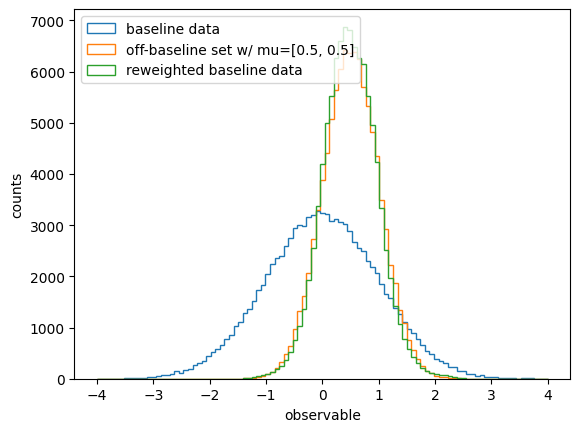

In [14]:
base_alpha = [0.,1.]
goal_alpha = [0.5,0.5]
rng, subkey = jr.split(rng)
off_set = generate_discrete_dataset(subkey,goal_alpha[0],goal_alpha[1],N)

reweight = flow.get_weights(baseline_data,jnp.array(base_alpha),jnp.array(goal_alpha))
fig, ax = plt.subplots()
bins = jnp.linspace(-4,4,100)
ax.hist(baseline_data,bins=bins,histtype="step",label="baseline data")
ax.hist(off_set,bins=bins,histtype="step", label=f"off-baseline set w/ mu={goal_alpha}")
ax.hist(baseline_data,bins=bins,histtype="step",weights=reweight,label="reweighted baseline data")
ax.set_xlabel("observable")
ax.set_ylabel("counts")
plt.legend()

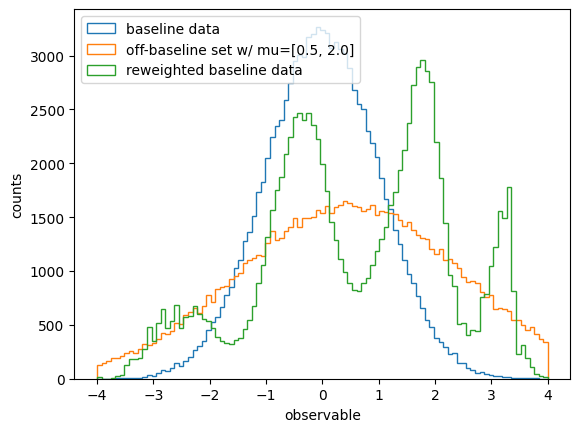

In [15]:
base_alpha = [0.,1.]
goal_alpha = [0.5,2.]
rng, subkey = jr.split(rng)
off_set = generate_discrete_dataset(subkey,goal_alpha[0],goal_alpha[1],N)

reweight = flow.get_weights(baseline_data,jnp.array(base_alpha),jnp.array(goal_alpha))
fig, ax = plt.subplots()
bins = jnp.linspace(-4,4,100)
ax.hist(baseline_data,bins=bins,histtype="step",label="baseline data")
ax.hist(off_set,bins=bins,histtype="step", label=f"off-baseline set w/ mu={goal_alpha}")
ax.hist(baseline_data,bins=bins,histtype="step",weights=reweight,label="reweighted baseline data")
ax.set_xlabel("observable")
ax.set_ylabel("counts")
plt.legend()